In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op


In [60]:
filename = 'ex2data2.txt'
data = np.loadtxt(filename, delimiter=',')#b=np.linalg.inv(a)


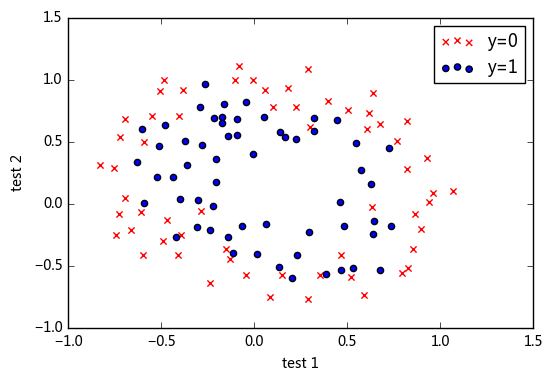

In [15]:
#plt data
#from mpl_toolkits.mplot3d import Axes3D
#ax = plt.subplot(111, projection='3d')
ax = plt.subplot(111)
X_0 = data[np.where(data==0)[0]]
X_1 = data[np.where(data==1)[0]]
ax.scatter(X_0[:,0:1], X_0[:, 1:2], marker = 'x', c='r', label='y=0')
ax.scatter(X_1[:,0:1], X_1[:, 1:2], marker = 'o',c='b', label='y=1')
plt.legend(loc=0)
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.show()

In [16]:
X_no1 = data[:,0:2]
y = data[:, 2:]

In [51]:
def mapfeature(X, degree):
    insert_1 = np.ones((X.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            X_change = (X[:, 0:1]**j)*(X[:, 1:2]**(i-j))
            insert_1 = np.c_[insert_1, X_change]
            
    return insert_1
X = mapfeature(X_no1, 4)

In [52]:
theta = np.zeros((X.shape[1], 1))

In [53]:
def sigmoid(theta, X):
    z = X.dot(theta)
    g = 1/(1+np.exp(-z))
    return g

In [54]:
def costfunction(theta, X, y):
    m = len(y)
    h = sigmoid(theta, X)
    J = 1/m*(-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h)))
    return J

In [55]:
costfunction(theta, X, y)

array([[ 0.69314718]])

In [56]:
def gradientdescent(theta, X, y):
    m = len(X)
    h = sigmoid(theta, X)
    grad = 1/m*(X.T.dot(h-y))
    return grad.flatten()
    

In [57]:
result = op.minimize(fun=costfunction, x0=theta, args=(X, y), method='TNC')# jac=gradent)
theta_optim = result.x
theta_optim

array([ 4.06833382,  4.98895973,  2.46306844, -7.03914675, -5.79573882,
       -6.46187144, -1.53592921, -1.46148886, -4.12687277,  0.90675667,
       -4.75989069, -2.4811355 , -1.37517752,  1.80785309, -6.12531515])

C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


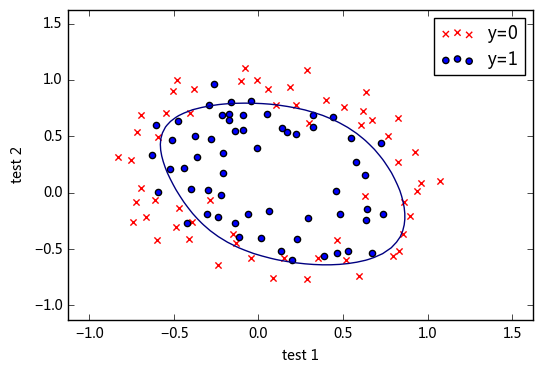

In [58]:
#show the data
ax1 = plt.subplot(111)
X_0 = data[np.where(data==0)[0]]
X_1 = data[np.where(data==1)[0]]
ax1.scatter(X_0[:,0:1], X_0[:, 1:2], marker = 'x', c='r', label='y=0')
ax1.scatter(X_1[:,0:1], X_1[:, 1:2], marker = 'o',c='b', label='y=1')
#plt the boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = mapfeature(np.array([[u[i], v[j]]]), 4).dot(theta_optim)

ax1.contour(u, v, z, 0)
plt.legend(loc=0)
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.show()


0.0

In [59]:
#prob = sigmoid(np.array([1,45,85]).dot(optimal_theta))
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    k = np.where(sigmoid(theta, X) >= 0.5)[0]
    p[k]= 1
    return p
p = predict(theta_optim, X)
acc = (p==y).mean()
print(acc)

0.85593220339
